<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

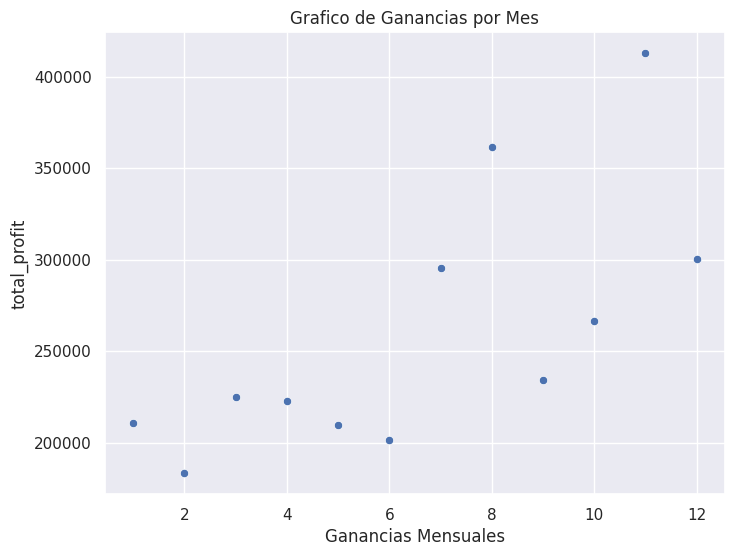

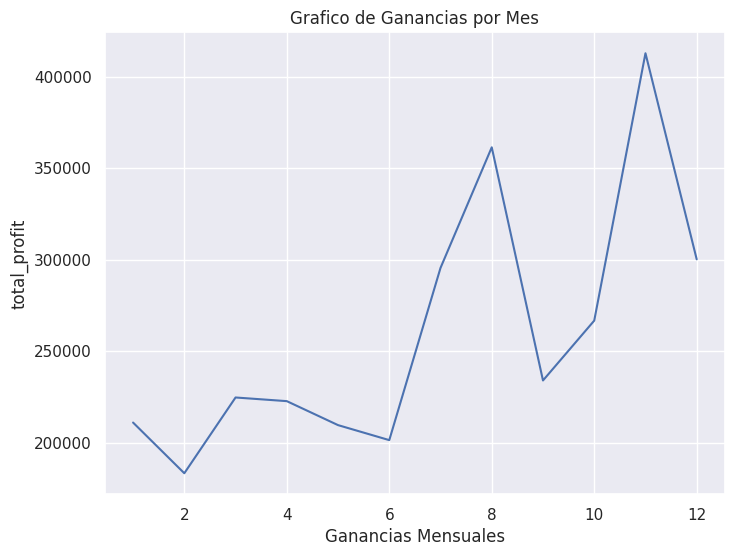

Se puede notar que en los meses de febrero y junio se presenta la menor cantidad de ventas 
y los meses agosto y noviembre son los meses con mas ventas


In [61]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(
        x='month_number',
        y='total_profit',
        data=df,
)
plt.xlabel('Mes')
plt.xlabel('Ganancias Mensuales')
plt.title('Grafico de Ganancias por Mes')
plt.show()

plt.figure(figsize=(8, 6))
palette = sns.color_palette("hls", 6)

sns.lineplot(
        x='month_number',
        y='total_profit',
        data=df,
)
plt.xlabel('Mes')
plt.xlabel('Ganancias Mensuales')
plt.title('Grafico de Ganancias por Mes')
plt.show()
print('Se puede notar que en los meses de febrero y junio se presenta la menor cantidad de ventas \ny los meses agosto y noviembre son los meses con mas ventas')

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

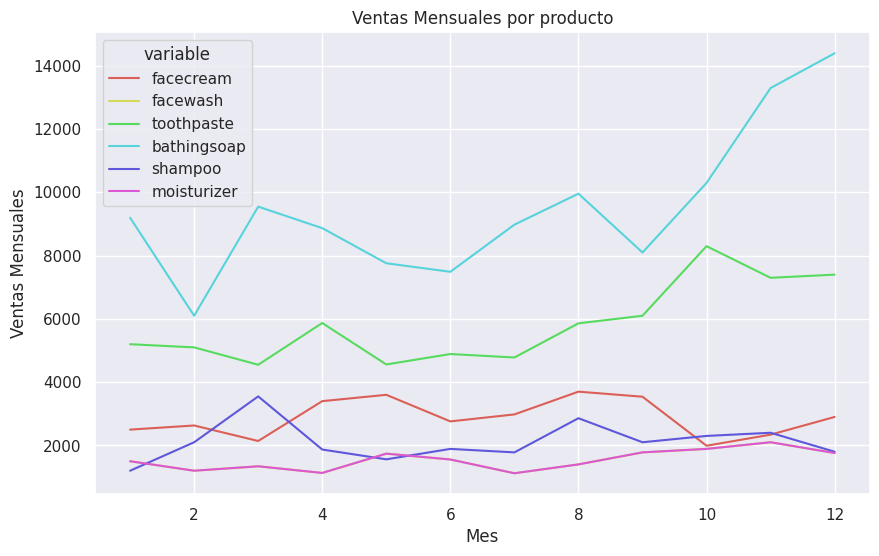

Se puede ver que los productos han tenido una tendencia creciente hacia los meses finales


In [62]:
colum= ['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer']
dflong=df[colum].melt(id_vars=['month_number'])
dflong
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.lineplot(
    x='month_number',
    y='value',
    hue='variable',
    data=dflong,
    palette=palette
)
plt.xlabel('Mes')
plt.ylabel('Ventas Mensuales')
plt.title('Ventas Mensuales por producto')
plt.show()
print('Se puede ver que los productos han tenido una tendencia creciente hacia los meses finales')

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

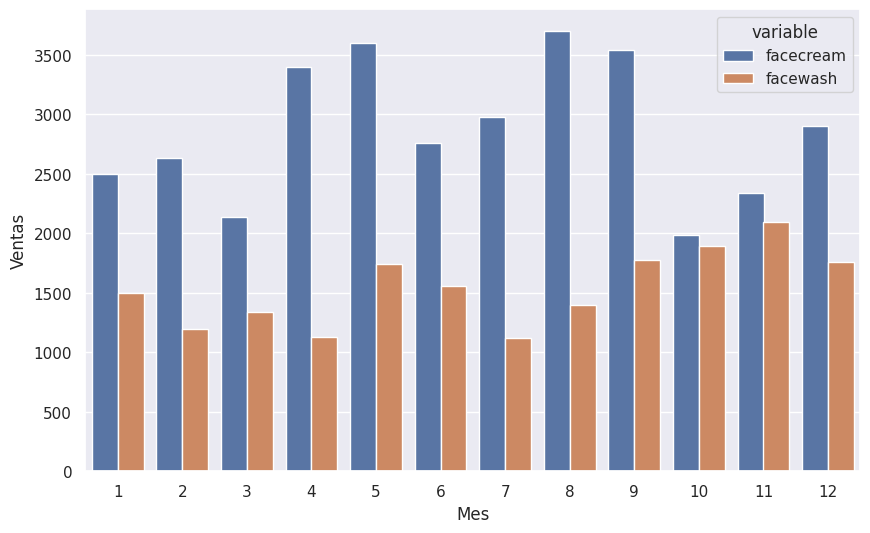

Al comparar las ventas por mes, se puede apreciar que el producto facecream con facewash, 
se puede notar que en todos los meces facecream fue mas vendido


In [59]:
df_face = dflong.loc[lambda x: x['variable'].isin([ "facecream","facewash"])]

plt.figure(figsize=(10, 6))
sns.barplot(
    x='month_number',
    y='value',
    hue='variable',
    data=df_face )
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()
print('Al comparar las ventas por mes, se puede apreciar que el producto facecream con facewash, \nse puede notar que en todos los meces facecream fue mas vendido')

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

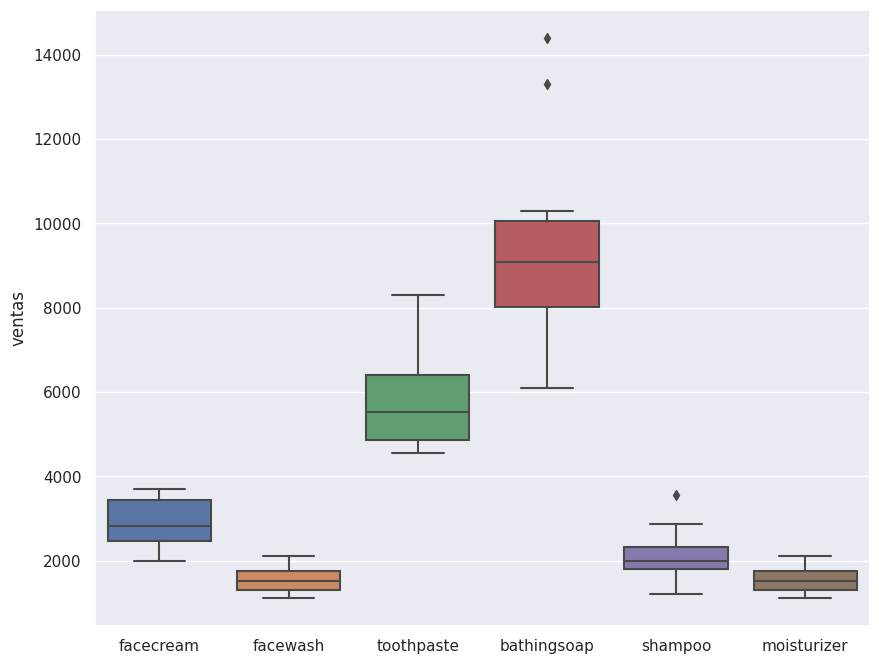

podemos ver que el producto facewash, shampo, moisturizer son los productos menos vendidos con una menor varianza, 
en cambio toothpaste y bathingsoap son los productos mas vendidos y presentan una mayor variabilidad


In [60]:
# Pre-format DataFrame
datos_venta =df.drop(['month_number','total_profit','total_units'], axis=1)
#print(datos_venta)
# New boxplot using stats_df
plt.figure(figsize=(10, 8))
sns.boxplot(data=datos_venta)
plt.ylabel('ventas')
plt.show()
print('Podemos ver que el producto facewash, shampo, moisturizer son los productos menos vendidos con una menor varianza, \nen cambio toothpaste y bathingsoap son los productos mas vendidos y presentan una mayor variabilidad')

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

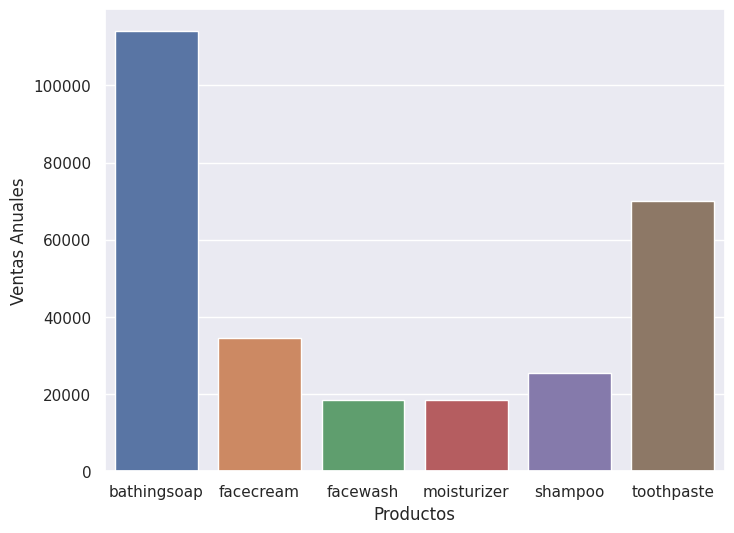

Del grafico de barra se puede apreciar que los productos mas vendidos son bathingsoap, seguido de toothpaste, 
los demas productos se venden en menor medida de manera similar


In [57]:
df_gan =dflong.groupby('variable')['value'].sum().reset_index()

sns.barplot(
    data = df_gan,
    x = 'variable',
    y= 'value'
)
plt.xlabel('Productos')
plt.ylabel('Ventas Anuales')
plt.show()

print('Del grafico de barra se puede apreciar que los productos mas vendidos son bathingsoap, seguido de toothpaste, \nlos demas productos se venden en menor medida de manera similar')